User Notes:

Run the cell below.

Some things to know:

    The date range for your search starts from the current date and time and then goes back the number of days that you enter.
    
    Run time is highly variable and depends on the number of submissions and comments for a particular stock symbol that were made for your date range.
    
    There is the chance that the stock that you have chosen has no submissions or comments. If this is the case there is no sentiments so the program will terminate.
    
    If there are no submissions and/or no comments try increasing the date range by going back a larger number of days. 
    
    The prompt indicates a maximum of going back 14 days or two weeks. This is a guideline. You can go back a greater number of days if needed.
    
    There is a "glitch" in the program that causes a run time error. This may be rectified in a future revision.
    
The most important thing to know: There are no guarantees that the information contained or presented as a result of running this program is accurate or correct. You should not use any information presented as a result of running this program to make any decisions, especially those concerning any investments. 
    

Revision History:

1.0 - Makes Reddit parser into a method; blends the output with NLTK Vader, which is used to analyze the comments for their sentiment. Represents the sentiments in graphical form. Provides a word cloud for the positive, neutral and negative sentiments.

2.0 - Combines the library cell, the methods cell and the main cell into one cell for the ease of use. Removes the ability to output the results to a csv file, which removes the need to specify file names for the appropriate csv files. Adds a program termination condition if there are no submission or comments.

2.1 - Repairs the runtime error that sporatically occurs
  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pstri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


What stock symbol do you want to see? tsla
How many days back do you want to go? [Enter an integer between 1 and 14.] 
7
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
Working ...
created timesta

<Figure size 720x576 with 0 Axes>

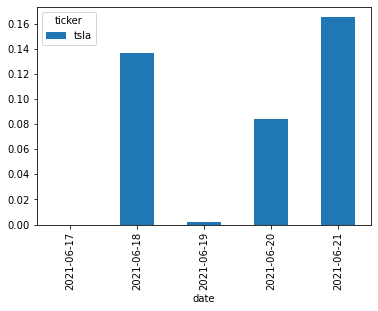

Here is a bar chart of the average sentiment values by date!
Press enter to move on. Coming up is the histogram of sentiment values!


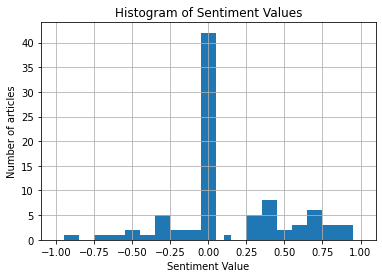

Here is a histogram of the sentiment values!
NOTE: The 0.0 bar contains both neutral and no comment sentiments.
Press enter to move on. Coming up is the sentiment pie chart!

The percent of articles with Positive, Neutral and Negative sentiment for  tsla


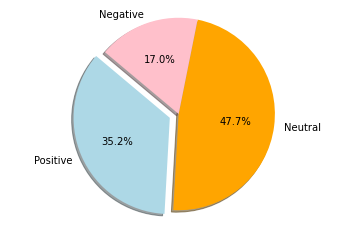

Press enter to move on. Coming up is the postive sentiment word cloud!


*****************
POSITIVE SENTIMENT: 
The number of positive sentiment numbers is:  31
The percent of postive sentiment numbers is:  35.22727272727273 % 



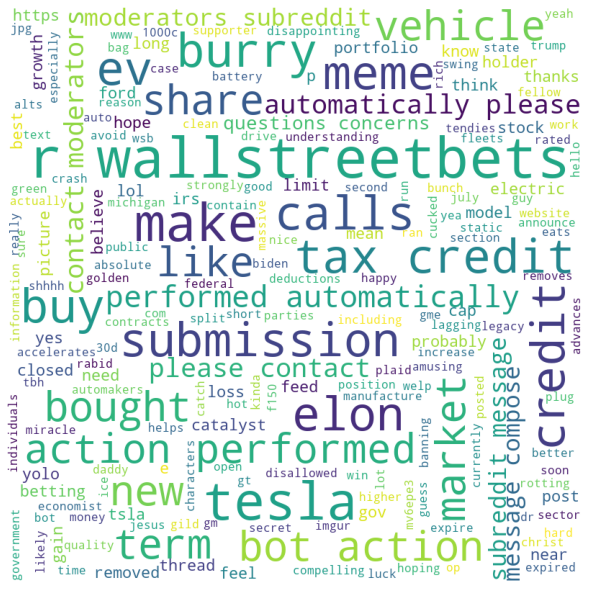

What is the key word you want to search? [press "enter" for none]
Moving on to the neutral sentiment word cloud...

*****************
NEUTRAL SENTIMENT:
The number of neutral sentiment numbers is:  42
The percent of neutral sentiment numbers is:  47.72727272727273 % 



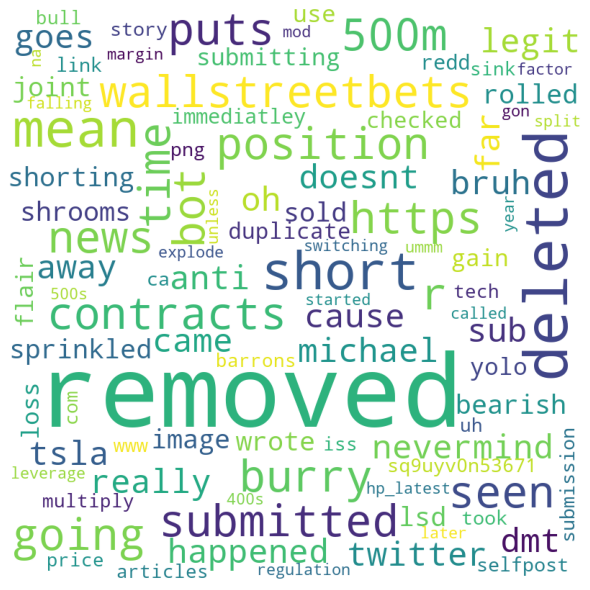

What is the key word you want to search? [press "enter" for none]
Moving on negative sentiment word cloud ...

*****************
NEGATIVE SENTIMENT: 
The number of negative sentiment numbers is:  15
The percent of negativetive sentiment numbers is:  17.045454545454543 % 



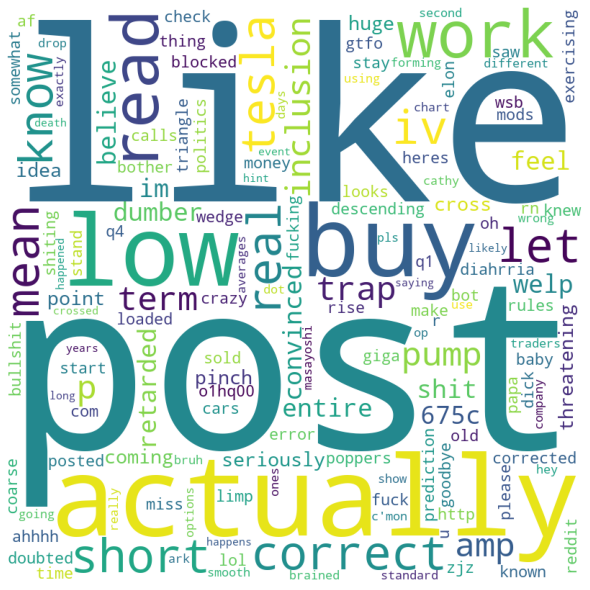

What is the key word you want to search? [press "enter" for none]
All done ...


In [6]:
# RUN THIS CELL
import pandas as pd
import requests
import json
import csv
import time
import datetime

# for nltk sentiment analsys and graphics
#mport pandas as pd
import numpy as np
import sys
sys.path.append('C:\Windows\system32\pystocktwits')
# This appends the system path for Python Jupyter Notebooks so it can find 'pystocktwits.' 
#it must be run everytime. https://www.peterbakke.com/data-analysis/set-system-path-python-jupyter-notebooks/

import datetime as dt
import pytz

import os # to delete csv file

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

import time
import nltk.classify


#####################################################
# METHODS FOR PARSER                                #
#####################################################

def getPushshiftData(query, after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    #print(url)
    r = requests.get(url)
    data = json.loads(r.text)
    #print("******* getPushshiftData Method *******")
    print('Working ...')
    return data['data']

def getComments(subID): # get comments for a given submission
    #api.pushshift.io/reddit/search/comment/?link_id=9ctna9 get the comments for a submission
    url = 'https://api.pushshift.io/reddit/search/comment/?link_id='+str(subID)
    #print("url:"+ url)
    try:
        r = requests.get(url)
        data = json.loads(r.text) # dictionary key “data”, followed by a list of nested dictionaries 
    except requests.exceptions.RequestException as e: 
        print(e)
    
    #print("******* getComments Method ********")
    print('Working ...')
    return data['data']

def collectCommentData(comment):   # extract key data points from input json and add to global dictionary
    commentData = list() #list to store data points
    try:
        flair = comment['link_flair_text']  # not all posts will come with a flair
    except KeyError:
        flair = "NaN"    
    author = comment['author']  # extract data from dictionary entry
    link_id = comment['link_id']
    comment_id = comment['id']
    body = comment['body']
    created = datetime.datetime.fromtimestamp(comment['created_utc']) #1520561700.0
    permalink = comment['permalink']
    
    commentData.append((comment_id,link_id,author,created,permalink,body,flair)) # add elements to list
    commentStats[comment_id] = commentData #add to global substats dictionary using subid as key

def collectSubData(subm):
    subData = list() #list to store data points
    title = subm['title']
    url = subm['url']
    try:
        flair = subm['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = subm['author']
    sub_id = subm['id']
    score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    numComms = subm['num_comments']
    permalink = subm['permalink']
    
    subreddit = subm['subreddit']
    
    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair,subreddit))

    subStats[sub_id] = subData
    
    # get the comments
    comCount = 0
    commentData = getComments(sub_id)
    for comment in commentData: # loop through dictionary key value pairs and add comments to global dictionary
        collectCommentData(comment)
        comCount+=1
    #print("num comments for submission:"+sub_id+"="+str(comCount))
    
def updateSubs_file():
    upload_count = 0
    
    #print("input filename of submission file, please add .csv")
    #filename = input()
    
    file = 'filename'
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        #a = csv.writer(file, delimiter=',')
        #headers = ["Post ID","Title","Url","Author","Score","Publish Date","Total No. of Comments","Permalink","Flair"]
        #a.writerow(headers)
        for sub in subStats:
            #a.writerow(subStats[sub][0])
            upload_count+=1
            
        #print(str(upload_count) + " submissions have been uploaded")
        
#updateSubs_file()
#added from modified file by PH; writes the comment file
%pwd
def updateComs_file():
    upload_count = 0
    parsed_data = []
    #location = "\\Reddit Data\\"
    #location = "C:\\Program Files\\Microsoft\\PyForMLS\\samples\\Reddit Data\\"
    
    #print("input filename of comments file, please add .csv")
    #filename = input()
    file = 'filename'
    
    #file = location + filename
    
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        #a = csv.writer(file, delimiter=',')
        #headers = ["comment_id","link_id","author","created","permalink","body","flair"]
        
        #a.writerow(headers)
        for com in commentStats:
            
            #print(commentStats[com][0])
            #a.writerow(commentStats[com][0])
            upload_count+=1
            
            parsed_data.append(commentStats[com][0])
            
        df = pd.DataFrame(parsed_data, columns = ["comment_id","link_id","author","created","permalink","body","flair"])
        
        print(str(upload_count) + " comments have been uploaded")
        
        if len(df) == 0:
            print('There are no comments! Try again using a number going back from today.')
            sys.exit()
        return df
        
###########
# METHODS FOR NLTK VADER SENTIMENT 
# MODIFIED FOR THIS SPECIFIC APP
###########

# METHODS FOR SCRAPING STOCKTWITS OUTPUT AND SCRUBBING FOR SENTIMENT ANLAYSIS

# splits 'created_at' into two columns 'date' and 'time.' Conversion_datetime must be run first to convert 'created_at'
#into the correct datetime format
#https://stackoverflow.com/questions/35538488/how-can-i-split-a-dataframe-column-with-datetimes-into-two-columns-one-with-dat
def split_created_at(df):
    #df['date'] = df['created'].dt.date
    #df['time'] = df['created'].dt.time
    
    df['date'] = [d.date() for d in df['created']]
    df['time'] = [d.time() for d in df['created']]
    
    return df

#### METHODS FOR NLTK VADER SENTIMENT ANALYSIS ####

def remove_stopwords(): #provides a comprehensive list of stopwords; returns 'stopWords'

    #440
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords

    #450
    stopWords = set(stopwords.words('english'))

    #print(len(stopWords))

    #470 creates a list of new stopwords and then adds them to the set provided by nltk
    # Note: it is case sensitive


    newStopWords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
    newStopWords += ['again', 'against', 'all', 'almost', 'alone', 'along']
    newStopWords += ['already', 'also', 'although', 'always', 'am', 'among']
    newStopWords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
    newStopWords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
    newStopWords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
    newStopWords += ['because', 'become', 'becomes', 'becoming', 'been']
    newStopWords += ['before', 'beforehand', 'behind', 'being', 'below']
    newStopWords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
    newStopWords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
    newStopWords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
    newStopWords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
    newStopWords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
    newStopWords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
    newStopWords += ['every', 'everyone', 'everything', 'everywhere', 'except']
    newStopWords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
    newStopWords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
    newStopWords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
    newStopWords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
    newStopWords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
    newStopWords += ['herself', 'him', 'himself', 'his', 'how', 'however']
    newStopWords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
    newStopWords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
    newStopWords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
    newStopWords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
    newStopWords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
    newStopWords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
    newStopWords += ['nevertheless', 'next', 'nine', 'nobody', 'none'] #removed 'no'
    newStopWords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
    newStopWords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
    newStopWords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
    newStopWords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
    newStopWords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
    newStopWords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
    newStopWords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
    newStopWords += ['some', 'somehow', 'someone', 'something', 'sometime']
    newStopWords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
    newStopWords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
    newStopWords += ['then', 'thence', 'there', 'thereafter', 'thereby']
    newStopWords += ['therefore', 'therein', 'thereupon', 'these', 'they']
    newStopWords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
    newStopWords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
    newStopWords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
    newStopWords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
    newStopWords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
    newStopWords += ['whatever', 'when', 'whence', 'whenever', 'where']
    newStopWords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
    newStopWords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
    newStopWords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
    newStopWords += ['within', 'without', 'would', 'yet', 'you', 'your']
    newStopWords += ['yours', 'yourself', 'yourselves'] #provided by Codecademy??

    # additional stopwords:
    newStopWords += ['[Screenshot]', '[screenshot]', 'Screenshot', '[Screenshot]Great', '[SCREENSHOT]', 'screenshot', 
                 'The', 'the', 'SMART', 'yah', 'got', 'nutty', 'moving', 'weeks', 'Got', 'So', 'today', 'Been', 'or',
                    "n't"]

    newStopWords += ['I', 'it', 'It'] # pronouns

    newStopWords += ['AMD', 'NVDA','NVDA', 'TSLA', 'GOOG', 'BA', 'FB', 'GOOGL', 'INTC', 'intel', 'Intel', 'CSCO', 'MU', 
                 'SMH', 'TSM','AAPL', 'TSLA', 'CSCO', 'POETF', 'PHOTONICS', 'DD', 'ARWR', 'T', 'INFI', 'AMC', 'ARK',
                'GME', 'NIO', 'QS', 'ADBE', 'MSFT'] # Stock symbols or names

    newStopWords += ['Readytogo123', 'Maddog68','Stocktwits'] # nouns

    newStopWords += ['.', '?', '!', ';', ',', "'"] # punctuation

    newStopWords += ['&', '#', '%', '$', '@'] # symbols

    newStopWords += ['41.75', '530.05', '39', 'Two', 'two',] # numbers

    #adds them to the stopWords list provided by nltk
    for i in newStopWords:
        stopWords.add(i) #stopWords is defined as a "set" in #450 when inputed as english words from nltk;
        # sets cannot be ordered so it must be converted back to a list to be ordered or alphabetized. A set has no duplicate elements.

    #print(len(stopWords))
    #print(stopWords)

    #converts the set to a list
    stopWords_list = list(stopWords)

    #sorts the stopword list
    stopWords_list.sort(key = lambda k : k.lower())
    #print(stopWords_list)
    
    
    #480 This removes words from the list of stopwords and writes list to csv file
    # https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python#:~:text=one%20more%20easy%20way%20to%20remove%20words%20from,%3D%20words%20-%20stopwords%20final_list%20%3D%20list%20%28final_list%29
    #new_words = list(filter(lambda w: w not in stop_words, initial_words))

    WordsToBeRem = ['no'] #words to be removed from the stopword_list
    stopWords = list(filter(lambda w: w not in WordsToBeRem, stopWords_list)) #stopWords_list has been sorted in #470

    #converts the stopword list to a df and then outputs the df to a csv file
    df_stopwords = pd.DataFrame(stopWords, columns = ['stopwords'])
    df_stopwords.to_csv('stopwords.csv', index = False) #writes the csv file
    
    return stopWords

def remove(df, stopWords): #returns a df where the stopwords are removed

    dfScrubbed = df.copy() #This is a deep copy. df.copy(deep = True); deep = True is default

    i = 0
    
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        words = word_tokenize(data) #the title is separated into individual words (tokenized)
        wordsFiltered = []

        for w in words:
            if w not in stopWords:
                wordsFiltered.append(w)
    
        joinedWordsFiltered = ' '.join(wordsFiltered) #combines the individual words into one string
    
        dfScrubbed.iloc[i,1] = joinedWordsFiltered # replaces the recorded in dfAPIScrubbed with the stopWords removed
        #from the 'body'
    
        i += 1
    
    #print(wordsFiltered)
    #print(dfScrubbed.head())

    return(dfScrubbed)

def wc(df): #creates the word cloud
    #from wordcloud import WordCloud, STOPWORDS 
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt 
    import pandas as pd 

    stopwords = set(stopWords) 
    words = ''
    for review in df.title:
        tokens = str(review).split()
        tokens = [i.lower() for i in tokens]
    
        words += ' '.join(tokens) + ' '
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

def kw(df,keyword): # searches a string for key words; if found will print out the date and title
    i = 0
    while i < len(df):
    
        data = df.iloc[i,1] #column #1 holds the titles of the posts
        a_bool = keyword in data

        if a_bool == True:
            print(df.iloc[i,0], df.iloc[i,1])
        
        i += 1

def search_repeat(df): # provides opportunity to do multiple searches on key words. returns only the appropriate yes or no response.
    key_word = input('What is the key word you want to search? [press "enter" for none]')
    if key_word:
        kw(df, key_word)
        answer = input('Do you want to do another search?')
    else:
        answer = 'no' #if there is not key word that is entered it sets answer to no. - assumes if there is no key word there is no desire to do another search.
    while answer not in yes_answer and answer not in no_answer: # Restricts answer to be either in the yes or no list by continuous looping on it unit input matches either list
        answer = error() # prompts for the correct yes or no response. The correct responses are in the yes_answer list and no_answer list.
    return answer

def error(): # provides user the opportunity to correct the user's input
    correction = input('Your input needs to be either a "y" or a "n". Would you like to do another search?')
    return correction

def error1(): # provides user the opportunity to correct the user's input
    correction = input('Your input needs to be either a "y" or a "n". Would you like to remove the stopwords from the titles?')
    return correction

def stopwords_yes_no(): # provides opportunity to removes stopwords from the titles. returns only the appropriate yes or no response.
    yes_no = input('Do you want to remove the stopwords from the titles? [press "enter" for no]')
    if yes_no in yes_answer:
        answer = 'yes'
    else:
        answer = 'no' #if there is not key word that is entered it sets answer to no. - assumes if there is no key word there is no desire to do another search.
    while answer not in yes_answer and answer not in no_answer: # Restricts answer to be either in the yes or no list by continuous looping on it unit input matches either list
        answer = error1() # prompts for the correct yes or no response. The correct responses are in the yes_answer list and no_answer list.
    return answer

##############################################################
#### MAIN                                                 ####
##############################################################

#Subreddit to query
# data will return the number of submissions or posts in the subreddit.
# query is a key word to be searched on in the subreddit
# after is the starting date for the search
# before is the ending date for the search
# sub is the subreddit

query = input('What stock symbol do you want to see? ')

sub = 'wallstreetbets'

unix_time = int(time.time()) # today's date in unix time
before = unix_time
#after = int(before - (60 * 60 * 24 * 7)) # one weeks prior to current date

days = int(input('How many days back do you want to go? [Enter an integer between 1 and 14.] \n'))

after = int(before - (60 * 60 * 24 * days)) # one weeks prior to current date

subCount = 0
subStats = {}

# modified by PH; added
commentStats = {} # dictionary to hold comments

%pwd # set path to present working directory

data = getPushshiftData(query, after, before, sub)
# Will run until all posts have been gathered from the 'after' date up until before date

# while there is at lease one post the 
while len(data) > 0:
    for submission in data:
        # collectSubData collects the:
        collectSubData(submission)
        
        # "subCount" is the number of posts in a subreddit
        subCount+=1
    
    # Calls getPushshiftData() with the created date of the last submission
    
    # modified by PH
    #print('length = ',len(data))
    #print("submissions returned in getPushshiftData dictionary:" + str(subCount))
    #print("len dictonary returned in call:"+str(len(data)))
    
    #print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    print("created timestamp:"+str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))

    #end
    
    after = data[-1]['created_utc']
    
    data = getPushshiftData(query, after, before, sub)
    
updateSubs_file()
df = updateComs_file() #writes a csv file and also converts data to a df

# modified by PH    

#print("after while loop len data:"+str(len(data)))
#end

# added by PH
""""Here, we turn the dictionary values into a list, access the first entry [0 up to X entries], access that entry’s tuple 
[always 0], access needed value in tuple [0 up to 7 elements]. And to access the last entry in any list we write -1."""

#print(str(len(subStats)) + " submissions have added to list")
print("1st entry is:")
print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
print("Last entry is:")
print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))
# end of Reddit parser

#display(df)

## PERFORMS THE VADER SENTIMENT ANALYSIS.
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['body'].apply(f) # uses the scrubbed title data to generate the sentiment score and places the result back into the non-scrubbed df

## CONVERT CREATED DATE INTO TWO COLUMNS, ONE CALLED DATE AND THE OTHER CALLED TIME
#df = conversion_datetime(df)
df = split_created_at(df)

## CREATES A COLUMN NAMED TICKER WITH THE SYMBOL NAME
df['ticker'] = query

#### PLOTS AVERAGE SENTIMENT VALUES AS A FUNCTION OF DATES     

tickers = query
        
plt.figure(figsize = (10 ,8))

mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()

mean_df.plot(kind = 'bar')

print(tickers)
plt.show()
print('Here is a bar chart of the average sentiment values by date!')

import time
time.sleep(1.0)

pause = input('Press enter to move on. Coming up is the histogram of sentiment values!') #paulses after the sentiment by date histogram

#### PROVIDES DATE RANGES AND SIMPLE STATISTICS ON THE SENTIMENT OF THE TITLES

# provides basic sentiment statistics; added by si
i = 0 # set starting index number to 0
pos_counter = 0 # sets starting positive counter to 0
neu_counter = 0
neg_counter = 0

dfpos = pd.DataFrame(columns = ['date', 'title']) #initializes df where positive titles are stored
dfneu = pd.DataFrame(columns = ['date', 'title'])
dfneg = pd.DataFrame(columns = ['date', 'title'])

# for the sentiment histogram
sent_hist = []

# Separate the sentiment values into pos, neu, and neg
while i < len(df):
    #sent_hist.append(df.iloc[i,4]) # added for the sentiment histogram
    sent_hist.append(df.loc[i,'compound']) # added for the sentiment histogram
    if df.loc[i, 'compound'] > 0.0:
            pos_counter += 1
            dfpos = dfpos.append(dict(zip(dfpos.columns,[df.loc[i, 'date'], df.loc[i,'body']])), ignore_index=True) #fill dfpos df

    elif df.loc[i,'compound'] == 0.0:
            neu_counter += 1
            dfneu = dfneu.append(dict(zip(dfneu.columns,[df.loc[i, 'date'], df.loc[i,'body']])), ignore_index=True)

    elif df.loc[i,'compound'] < 0.0:
            neg_counter += 1
            dfneg = dfneg.append(dict(zip(dfneg.columns,[df.loc[i, 'date'], df.loc[i,'body']])), ignore_index=True)
            
    i += 1
    
#### SENTIMENT HISTOGRAM by sentiment value
sent_hist = np.asarray(sent_hist)
plt.figure()
#plt.hist(sent_hist, bins=20, range=[-1.0, 1.0])
plt.hist(sent_hist, bins=[-1.0,-0.95,-0.85,-0.75, -0.65, -0.55, -0.45, -0.45, -0.35, -0.25, -0.15,
                          -0.05, 0.05, 0.10, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 
                          1.0], range = [-1.0, 1.0]) 
plt.title('Histogram of Sentiment Values')
plt.xlabel('Sentiment Value')
plt.ylabel('Number of articles')
plt.grid()
plt.show()

print('Here is a histogram of the sentiment values!')
print('NOTE: The 0.0 bar contains both neutral and no comment sentiments.')

time.sleep(1)
pause = input('Press enter to move on. Coming up is the sentiment pie chart!\n') #pauses after the sentiment by value

#### PIE CHART ####

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos_counter, neu_counter, neg_counter]
colors = ['lightblue', 'orange', 'pink']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

#print(tickers)
print('The percent of articles with Positive, Neutral and Negative sentiment for ', tickers)
plt.show()

time.sleep(1)
pause = input('Press enter to move on. Coming up is the postive sentiment word cloud!\n') #pauses after the pie chart

#### produces the word clouds; added by si
print('\n*****************')
print('POSITIVE SENTIMENT: ')
print('The number of positive sentiment numbers is: ', pos_counter)
print('The percent of postive sentiment numbers is: ', pos_counter/len(df) * 100,'% \n')

time.sleep(1)
if pos_counter != 0:
    wc(remove(dfpos,remove_stopwords())) #creates the word cloud
else:
    print('There are no positive articles.')

#### Title searches on key words for postive ratings

time.sleep(1)

yes_answer = ['yes','YES','Yes','y','Y']
no_answer = ['no', 'NO', 'No', 'n', 'N']

repeat = 'yes' #initializes repeat to 'yes'; the user can/will change this in the search_repeat() method
    
while repeat in yes_answer:
    repeat = search_repeat(dfpos)

print('Moving on to the neutral sentiment word cloud...')

time.sleep(1)

print('\n*****************')
print('NEUTRAL SENTIMENT:')
print('The number of neutral sentiment numbers is: ', neu_counter)
print('The percent of neutral sentiment numbers is: ', neu_counter/len(df) * 100,'% \n')

if neu_counter != 0:
    wc(remove(dfneu,remove_stopwords())) #creates the word cloud
else:
    print('There are no neutral articles.')

#### Title searches on key words for neutral ratings
time.sleep(1)
repeat = 'yes'
while repeat in yes_answer:
    repeat = search_repeat(dfneu)

print('Moving on negative sentiment word cloud ...')

time.sleep(1)

print('\n*****************')
print('NEGATIVE SENTIMENT: ')
print('The number of negative sentiment numbers is: ', neg_counter)
print('The percent of negativetive sentiment numbers is: ', neg_counter/len(df) * 100,'% \n')

if neg_counter != 0:
    wc(remove(dfneg,remove_stopwords())) #creates the word cloud
else:
    print('There are no negative articles.')

#### Title searches on key words for negative ratings
time.sleep(1)
repeat = 'yes'
while repeat in yes_answer:
    repeat = search_repeat(dfneg)

#display(df)
print('All done ...')
